In [6]:
import pandas as pd 
import numpy as mp
import matplotlib.pylab as plt
from thefuzz import fuzz
plt.style.use('ggplot')

In [7]:
data = pd.read_csv('amazon.csv')

In [8]:
print(data.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [9]:
print(data.shape)

(9668, 12)


In [13]:
print(data.head(3))

  show_id   type                 title      director  \
0      s1  Movie   The Grand Seduction  Don McKellar   
1      s2  Movie  Take Care Good Night  Girish Joshi   
2      s3  Movie  Secrets of Deception   Josh Webber   

                                                cast        country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent         Canada   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar          India   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...  United States   

       date_added  release_year rating duration                listed_in  \
0  March 30, 2021          2014    NaN  113 min            Comedy, Drama   
1  March 30, 2021          2018    13+  110 min     Drama, International   
2  March 30, 2021          2017    NaN   74 min  Action, Drama, Suspense   

                                         description  
0  A small fishing village must procure a local d...  
1  A Metro Family decides to fight a Cyber Crimin...  
2  After a man disco

# Top 5 des meilleures catégories.

In [17]:
print(data.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


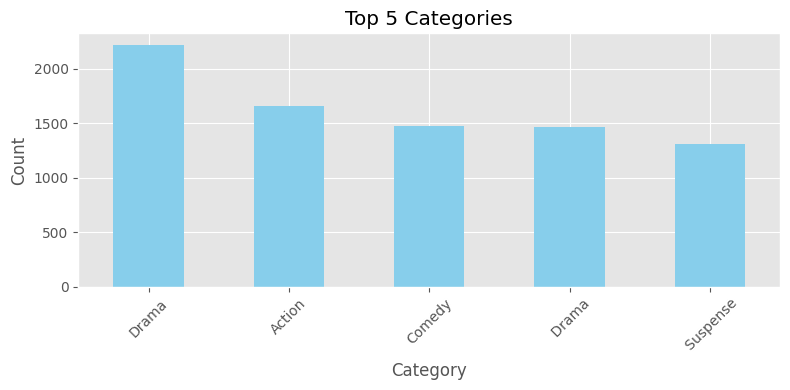

In [44]:
cat = data["listed_in"].apply(lambda c: pd.Series(c.split(","))).stack().reset_index(drop=True)
res = cat.value_counts().head(5)

plt.figure(figsize=(8, 4))
res.plot(kind='bar', color='skyblue')
plt.title('Top 5 Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 # Top 5 des réalisateurs.
 

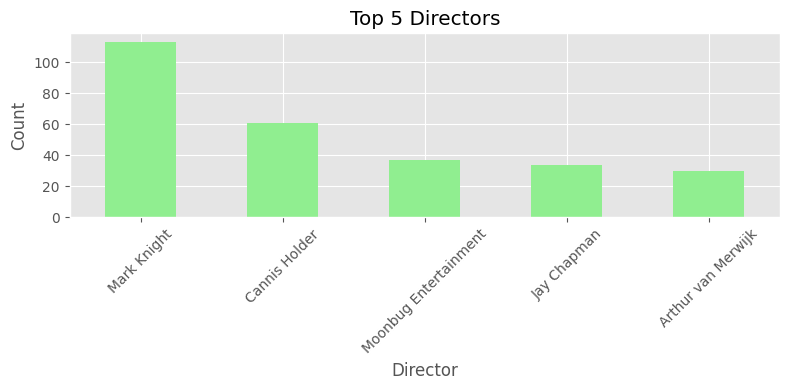

In [46]:
dir = data['director'].apply(lambda d: pd.Series(d).value_counts()).sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 4))
dir.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Directors')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Les dix meilleurs acteurs.

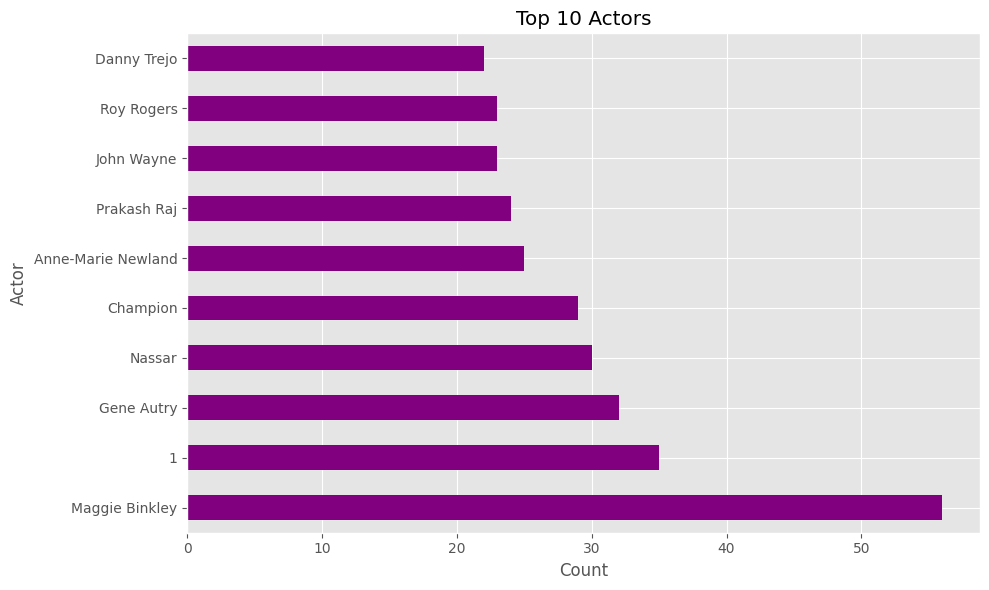

In [47]:
actors = data['cast'].str.split(', ', expand=True).stack().value_counts()
res = actors.head(10)

plt.figure(figsize=(10, 6))
res.plot(kind='barh', color='purple')
plt.title('Top 10 Actors')
plt.xlabel('Count')
plt.ylabel('Actor')
plt.tight_layout()
plt.show()


In [27]:
#believe it or not kayn actor smito 1 wla m3rt ana mklkh
print(actors.index.tolist())

['Maggie Binkley', '1', 'Gene Autry', 'Nassar', 'Champion', 'Anne-Marie Newland', 'Prakash Raj', 'John Wayne', 'Roy Rogers', 'Danny Trejo', 'Cassandra Peterson', 'Michael Madsen', 'Amitabh Bachchan', 'Erin Webbs', 'Eric Roberts', ' Ph.D.', 'Anjali', 'Grace Tamayo', 'Mystery Science Theater 3000 Guys', 'Vivek', 'Anupam Kher', 'Nayanthara', 'Kaali Venkat', 'George "Gabby" Hayes', 'Kevin Murphy', 'Bill Corbett', 'Gail Davis', 'Michael J. Nelson', 'Vijay', 'Paul Sorvino', 'Rani Mukerji', 'Vadivelu', 'Nani', 'Vijay Sethupathi', 'Prabhu', 'Manorama', 'Steven Seagal', 'John Hurt', 'LB', 'Yakima Canutt', 'Suriya', 'Eddie Izzard', 'Anil Kapoor', 'Dolph Lundgren', 'Santhanam', 'Anushka Shetty', 'Soori', 'Bruce Willis', 'Nicolas Cage', 'Aaron Michael', 'John Abraham', 'Nivetha Thomas', 'Akshay Kumar', 'John Rhys-Davies', 'Earl Dwire', 'Dhanush', 'Shah Rukh Khan', 'Goundamani', 'Peter Stormare', 'Kris Kristofferson', 'Grant Withers', 'Stevin John', 'Karunas', 'Madhavan', 'Paresh Rawal', 'Gary Coop

# Les cinq meilleures séries télévisées avec le plus grand nombre de saisons.

In [57]:
tvShows = data[data['type'] == 'TV Show']
tvShows = tvShows.sort_values('duration', ascending=False).head(5)
print(tvShows['title'])

800        Teen Wolf
185          Vikings
1081          Scrubs
3571    'Allo 'Allo!
867            Suits
Name: title, dtype: object


# Identifier des contenus similaires en faisant correspondre des caractéristiques textuelles

# Amazonse concentre-t-il davantage sur les séries télévisées que sur les films ces dernières années ?

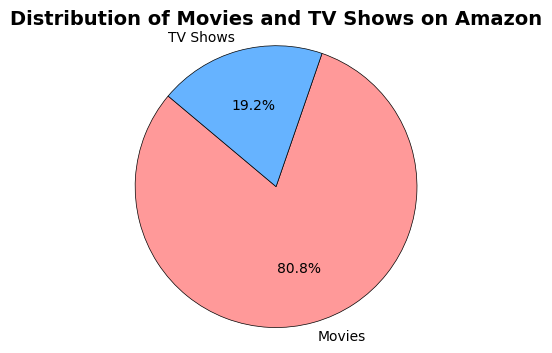

In [40]:
import matplotlib.pyplot as plt

count = [len(movies), len(tv_shows)]
labels = ['Movies', 'TV Shows']
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(4, 4))
plt.pie(count, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Movies and TV Shows on Amazon', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()
